# Loan Predictor Model


> ☝Before moving on with this demo you might want to take a look at:
> - 📗[Math behind the Neural Networks](https://github.com/trekhleb/homemade-machine-learning/tree/master/homemade/neural_network)



**Artificial neural networks (ANN)** or connectionist systems are computing systems vaguely inspired by the biological neural networks that constitute animal brains. The neural network itself isn't an algorithm, but rather a framework for many different machine learning algorithms to work together and process complex data inputs. Such systems "learn" to perform tasks by considering examples, generally without being programmed with any task-specific rules.


> **Demo Project:** In this example we will train a model to predict whether loan should be granted or not depending on certain cutomer features.

### Import Dependencies

- [pandas](https://pandas.pydata.org/) - library that we will use for loading and displaying the data in a table
- [numpy](http://www.numpy.org/) - library that we will use for linear algebra operations
- [matplotlib](https://matplotlib.org/) - library that we will use for plotting the data
- [math](https://docs.python.org/3/library/math.html) - math library that we will use to calculate sqaure roots etc.
- [seaborn](https://seaborn.pydata.org/) - library used for statistical data visualization.
- [scikit-learn](https://scikit-learn.org/stable/) - library for predictive data analysis.
- [tensorflow](https://www.tensorflow.org/) - library to develop and train ML models.

### Dataset Used

I have used a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

It consists of 2 datasets.
1. **lending_club_info** gives out the description of each attribute
2. **lending_club_loan_two** shows the values of each of the attributes.

In [15]:
import pandas as pd

In [16]:
data_info = pd.read_csv('../../data/lending_club_info.csv',index_col='LoanStatNew')

In [17]:
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [18]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [19]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [20]:
feat_info('mort_acc')

Number of mortgage accounts.


# Loading data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
df = pd.read_csv('../../data/lending_club_loan_two.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [24]:
#Shows the total null values in each feature
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

# Data Analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

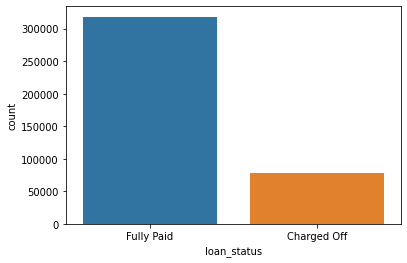

In [25]:
sns.countplot(x='loan_status',data=df)

(0.0, 45000.0)

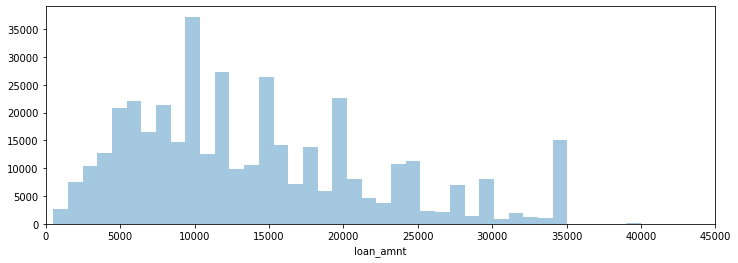

In [26]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)
plt.xlim(0,45000)

In [27]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10.0, 0.0)

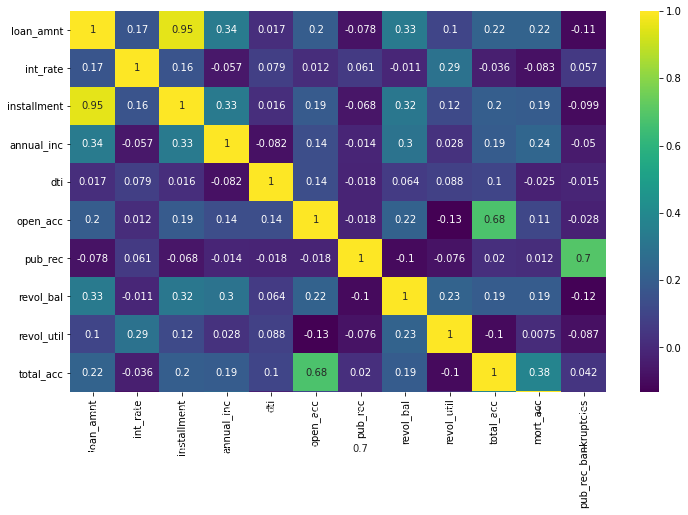

In [28]:
#Visualizing the correlation with the help of a heatmap
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10,0)

In [29]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [30]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

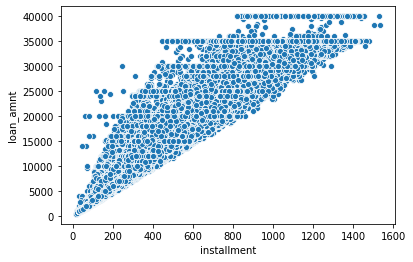

In [31]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

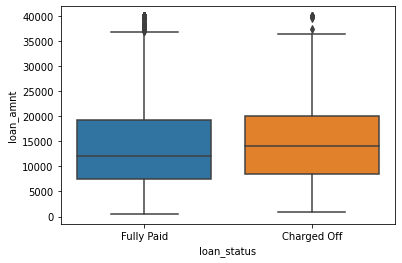

In [32]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [33]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [34]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [35]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='grade', ylabel='count'>

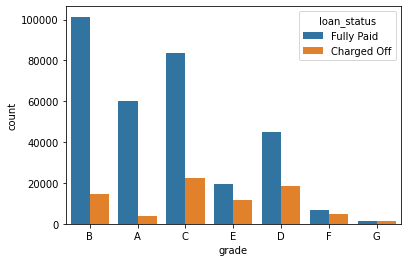

In [36]:
sns.countplot(x='grade',data=df,hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

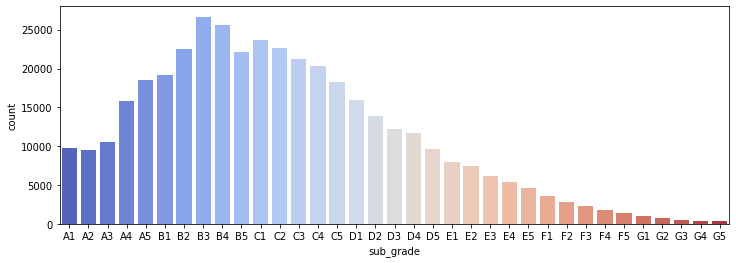

In [37]:
#As the values in the above graph are not soretd it's difficult to analyze the data
#Therefore plotting the graph in sorted way
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df,order=sorted(df['sub_grade'].unique()),palette='coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

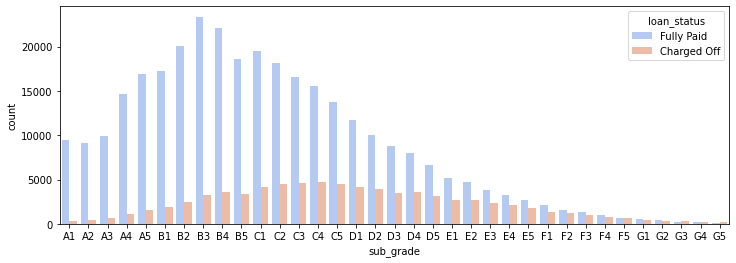

In [38]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df,hue='loan_status',order=sorted(df['sub_grade'].unique()),palette='coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

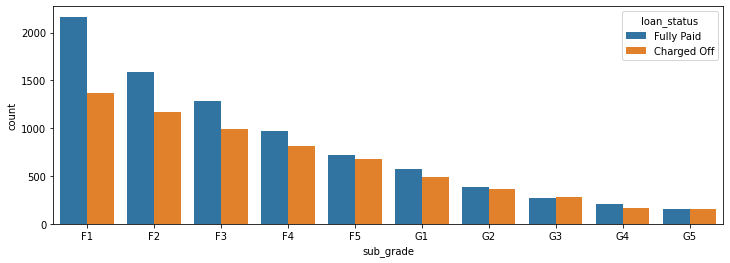

In [39]:
# To view for F and G subgrades
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

In [40]:
#Now to create a new column which conatins 1 and 0 for fully paid and charged off respectively
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [41]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [42]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
5,1,Fully Paid
6,1,Fully Paid
7,1,Fully Paid
8,1,Fully Paid
9,1,Fully Paid


<AxesSubplot:>

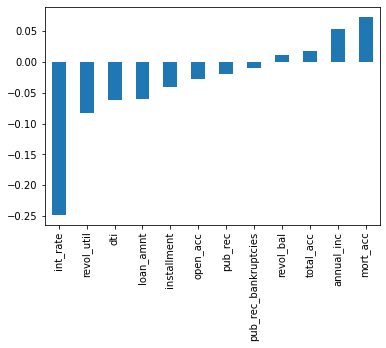

In [43]:
#A barplot showing th correlations of the numeric features to the new column created
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# Data Preprocessing

In [44]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing data

In [45]:
len(df)

396030

In [46]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [47]:
# Converting the sums to percentage
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

## Examining emp_title and emp_length

In [48]:
df['emp_title'].nunique()

173105

In [49]:
df['emp_title'].value_counts()

Teacher                              4389
Manager                              4250
Registered Nurse                     1856
RN                                   1846
Supervisor                           1830
Sales                                1638
Project Manager                      1505
Owner                                1410
Driver                               1339
Office Manager                       1218
manager                              1145
Director                             1089
General Manager                      1074
Engineer                              995
teacher                               962
driver                                882
Vice President                        857
Operations Manager                    763
Administrative Assistant              756
Accountant                            748
President                             742
owner                                 697
Account Manager                       692
Police Officer                    

### There are too many unique datas to convert so i'm dropping them

In [50]:
df=df.drop('emp_title',axis=1)

In [51]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [52]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

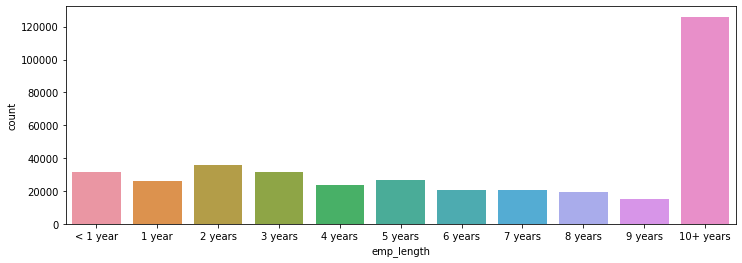

In [53]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

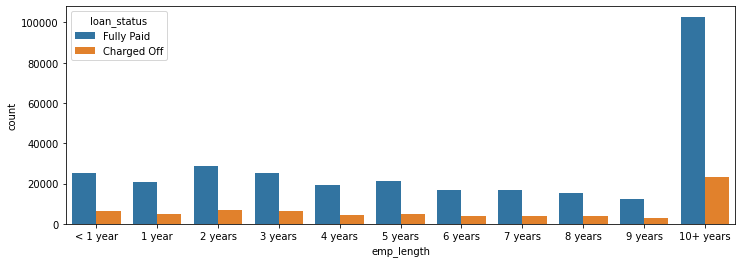

In [54]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

### Still can't say whether there is a strong relationship between employee length and loan_status. So need to explore more in it

In [55]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [56]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [57]:
emp_len=emp_co/emp_fp

In [58]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

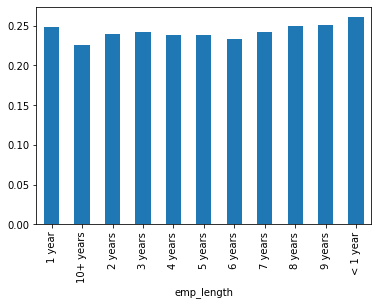

In [59]:
emp_len.plot(kind='bar')

In [60]:
#Since rates are similar,therefore,drop the column
df = df.drop('emp_length',axis=1)

In [61]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [62]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [63]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [64]:
#As we can see the title is just a subcategory of the purpose column
#Therefore drop the title column
df = df.drop('title',axis=1)

In [65]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [66]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**So it looks like the total_acc feature correlates with the mort_acc. Group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry**

In [67]:
total_acc_avg=df.groupby('total_acc').mean()['mort_acc']

In [68]:
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
7.0      0.221695
8.0      0.308422
9.0      0.365499
10.0     0.429158
11.0     0.526570
12.0     0.618034
13.0     0.722124
14.0     0.803482
15.0     0.940142
16.0     1.007405
17.0     1.151269
18.0     1.235885
19.0     1.358013
20.0     1.409380
21.0     1.519932
22.0     1.640736
23.0     1.721794
24.0     1.845867
25.0     1.900506
26.0     1.987414
27.0     2.103573
28.0     2.163050
29.0     2.231043
30.0     2.331386
31.0     2.390104
           ...   
90.0     2.000000
91.0     3.333333
92.0     5.000000
93.0     2.111111
94.0     2.909091
95.0     1.800000
96.0     3.000000
97.0     4.500000
98.0     0.500000
99.0     4.200000
100.0    4.000000
101.0    2.500000
102.0    3.500000
103.0    0.000000
104.0    8.000000
105.0    3.666667
106.0    1.500000
107.0    3.000000
108.0    0.000000
110.0    3.000000
111.0    2.000000
115.0    8.000000
116.0    4.500000
117.0    0.000000


In [69]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [70]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [71]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [72]:
#Since the 2 features account for very less number of missing points I have dropped them
df=df.dropna()

In [73]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

# Categorical variables and dummy variables

In [74]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [75]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [76]:
df['term']=df['term'].apply(lambda term:int(term[:3]))

In [77]:
#since grade is a part of the sub_grade,therefore, drop grade
df=df.drop('grade',axis=1)

In [78]:
subgrade_dummies=pd.get_dummies(df['sub_grade'],drop_first=True)

In [79]:
df=pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [80]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [81]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [82]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [83]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [84]:
#Converting these into dummy variables too but replacing NONE and ANY by OTHER so that I ultimately get only 4 categories
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [85]:
df['zip_code']=df['address'].apply(lambda address:address[-5:])

In [86]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [87]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

In [88]:
#issue_d is related to future so drop it
df=df.drop('issue_d',axis=1)

In [89]:
#Just need to extract the year from it 
feat_info('earliest_cr_line')
df['earliest_cr_line']

The month the borrower's earliest reported credit line was opened


0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
5         Jan-2005
6         Aug-2005
7         Sep-1994
8         Jun-1994
9         Dec-1997
10        Dec-1990
11        May-1984
12        Apr-1995
13        Jan-1997
14        May-2001
15        Sep-1994
16        Mar-1982
17        Sep-1996
18        Jan-1990
19        Mar-2000
20        Jan-2006
21        Mar-1999
22        Oct-2006
23        Jan-2003
24        May-2008
25        Oct-2003
26        Jun-2004
27        Jan-1999
28        Apr-1994
29        Mar-2000
            ...   
396000    Dec-1989
396001    May-2004
396002    Sep-2005
396003    Mar-1990
396004    Jul-1995
396005    Nov-2003
396006    Nov-1997
396007    Oct-1998
396008    Feb-1980
396009    Jul-2001
396010    Jul-2005
396011    Apr-2000
396012    Feb-1998
396013    Jul-1996
396014    Jan-2003
396015    Dec-1977
396016    Jun-1995
396017    Sep-2000
396018    Mar-1970
396019    May-2002
396020    Jan-1988
396021    No

In [90]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [91]:
df.select_dtypes('object').columns

Index(['loan_status'], dtype='object')

# Train Test Split

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
# Dropping loan_status since its a duplicate of loan_repaid
df=df.drop('loan_status',axis=1)

In [94]:
X=df.drop('loan_repaid',axis=1).values
y=df['loan_repaid'].values

In [95]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

# Normalizing the data

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
scaler=MinMaxScaler()

In [98]:
X_train=scaler.fit_transform(X_train)

In [99]:
X_test=scaler.transform(X_test)

# Creating the Model

In [100]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [101]:
X_test.shape

(79044, 78)

In [113]:
model = Sequential()

model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,  activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,  activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,  activation='relu'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [103]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test, y_test))

Train on 316175 samples, validate on 79044 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/25
316175/316175 [==============================] - 6s 18us/sample - loss: 0.5518 - val_loss: 0.3776
Epoch 2/25
316175/316175 [==============================] - 4s 12us/sample - loss: 0.4459 - val_loss: 0.4605
Epoch 3/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.4576 - val_loss: 0.3486
Epoch 4/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.4291 - val_loss: 0.3495
Epoch 5/25
316175/316175 [==============================] - 4s 12us/sample - loss: 0.4136 - val_loss: 0.4313
Epoch 6/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.3760 - val_loss: 0.4959
Epoch 7/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.3583 - val_loss: 0.2968
Epoch 8/25
316175/316175 [==============================] - 4s 14us/sample - loss: 0.3276 - 

# Evaluating Model Performance

In [104]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

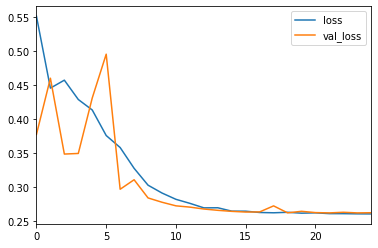

In [105]:
losses[['loss','val_loss']].plot()

In [106]:
from sklearn.metrics import classification_report,confusion_matrix

In [107]:
predictions = model.predict_classes(X_test)

In [108]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [109]:
confusion_matrix(y_test,predictions)

array([[ 6744,  8914],
       [   21, 63365]], dtype=int64)

## To check whether a person is granted loan

In [110]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt                       25000.00
term                               60.00
int_rate                           18.24
installment                       638.11
annual_inc                      61665.00
dti                                30.11
open_acc                           16.00
pub_rec                             0.00
revol_bal                       27778.00
revol_util                         65.50
total_acc                          46.00
mort_acc                            0.00
pub_rec_bankruptcies                0.00
A2                                  0.00
A3                                  0.00
A4                                  0.00
A5                                  0.00
B1                                  0.00
B2                                  0.00
B3                                  0.00
B4                                  0.00
B5                                  0.00
C1                                  0.00
C2                                  0.00
C3              

In [111]:
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]])

## Well the model predicts that loan should be given as the customer will pay back the loan. Let's see whether the customer really does pay back or not

In [112]:
df.iloc[random_ind]['loan_repaid']

1.0

## Yes the customer does pay back so the model predicted correctly.
## Yes the model can be improved by changing the number of hidden layers.